In this notebook, I shall create a piper diagram

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os, math
import matplotlib.pyplot as plt
import imageio

In [2]:
img = imageio.imread("Figures/PiperCompleto.png")

C:\Users\ettie\AppData\Local\Temp\ipykernel_14764\1254709006.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("Figures/PiperCompleto.png")


In [3]:
G_hydro_1 = pd.read_excel('y_LowerOIrangeEvW_OrigFile.xlsx','y_LowerOIrangeEvW_OrigFile')

In [4]:
# I will only use these following columns
# total number of columns: 20
df1 = G_hydro_1[[
                             'Monitoring Point Name',
                             'Latitude',
                             'Longitude',
                             'Drainage Region Name',
                             'Sample Start Date',
                             'Ca-Diss-Water (CALCIUM) (mg/L) Result',
                             'Mg-Diss-Water (MAGNESIUM) (mg/L) Result',
                             'Na-Diss-Water (SODIUM) (mg/L) Result',
                             'K-Diss-Water (POTASSIUM) (mg/L) Result',
                             'TAL-Diss-Water (TOTAL ALKALINITY AS CALCIUM CARBONATE) (mg/L) Result',
                             'Cl-Diss-Water (CHLORIDE) (mg/L) Result',
                             'SO4-Diss-Water (SULPHATE) (mg/L) Result']]

In [5]:
# I create a new df with better naming
# 
df = pd.DataFrame()
df['Monitoring Point Name'] = df1['Monitoring Point Name']
df['Latitude']=df1['Latitude']
df['Longitude']=df1['Longitude']
df['Drainage Region Name'] = df1['Drainage Region Name']
df['Ca (mg/L)'] = df1['Ca-Diss-Water (CALCIUM) (mg/L) Result']
df['Mg (mg/L)'] = df1['Mg-Diss-Water (MAGNESIUM) (mg/L) Result']
df['Na (mg/L)']= df1['Na-Diss-Water (SODIUM) (mg/L) Result']
df['K (mg/L)'] = df1['K-Diss-Water (POTASSIUM) (mg/L) Result']
df['HCO3 (mg/L)'] = df1['TAL-Diss-Water (TOTAL ALKALINITY AS CALCIUM CARBONATE) (mg/L) Result'] * 1.219
df['Cl (mg/L)'] = df1['Cl-Diss-Water (CHLORIDE) (mg/L) Result']
df['SO4 (mg/L)'] = df1['SO4-Diss-Water (SULPHATE) (mg/L) Result']

In [6]:
# Define the mapping between drainage regions and resource units 23 GRU's
resource_units = {
    'GRU1': ['D71A','D71C','D71D','D72A','D72B','D73B','D72C','D73C','D73D','D73E','D73F'],
    
    'GRU2': ['D81A','D81B','D81D','D81E','D81F','D81G'],
    
    'GRU3': ['D82A','D82B','D82C','D82D',],
    
    'GRU4.1': ['D82E','D82F','D82G','D82H','D82J','D82K','D82L'],
    
    'GRU4.2': ['F10A','F10B','F10C','F20C','F20D','F20E'],
    
    'GRU6.1': ['D61A','D61B','D61C','D61D','D61E','D61F','D61G','D61H','D62C','D62D'],
    
    'GRU6.2': ['D61J','D61K','D61L','D61M','D62A','D62B','D62E','D62F'],
    
    'GRU6.3': ['D62H','D62G','D62J'],
    
    'GRU7.1': ['D51B','D51C','D52C','D55A','D55B','D55C','D55D','D55E','D55G','D55K','D56D','D56F','D56G','D56H','D56J'],
    
    'GRU7.2': ['D54A','D54B','D54C','D55F','D55H','D55J','D55L','D52D','D52E','D52F','D58A'],
    
    'GRU7.3': ['D53F','D54D','D54F','D57D'],
    
    'GRU7.4': ['D51A','D52A','D52B','D56A','D56B','D56C','D56E'],
    
    'GRU7.5': ['D54E','D55M','D57A','D57B','D57C','D58B','D58C'],
    
    'GRU7.6': ['D53D','D53G','D54G','D57E'],
    
    'GRU7.7': ['D53A','D53B','D53C','D53E','D53H','D53J'],
    
    'GRU8.1': ['F30A','F30B','F30C','F30D','F30E'],
    
    'GRU8.2': ['F40B','F40C','F40E','F40G','F50A','F50B','F50C','F50E','F50F','F20A','F20B','F20B','F20B','F30F','F30G'],
    
    'GRU8.3': ['F40A','F40D','F40F','F40H','F50G','F60A','F60B','F60C','F60D','F60E'],
    
    'GRU9.1': ['D41B','D41C','D41D','D41E','D41F','D41H','D41M'],
    
    'GRU9.2': ['D41G','D41L','D41J','D41K'],
    
    'GRU9.3': ['D71B','D73A'],
    
    'GRU10.1': ['D42A','D42B','D42C','D42D'],
    
    'GRU10.2': ['D42E','D81C']
}

# Create a new column 'resource_unit'
df['resource_unit'] = None

# Populate the 'resource_unit' column
def get_resource_unit(drainage_region):
    for ru, regions in resource_units.items():
        if drainage_region in regions:
            return ru
    return None

df['resource_unit'] = df['Drainage Region Name'].apply(get_resource_unit)

In [7]:
df = df.dropna()

In [14]:
# Group by 'resource_unit' and calculate the average of the specified columns
# This creates a new dataset called average_values
averaged_df = df.groupby('resource_unit')[['Ca (mg/L)', 'Mg (mg/L)', 'Na (mg/L)',
                                              'K (mg/L)', 'HCO3 (mg/L)', 'Cl (mg/L)', 'SO4 (mg/L)']].mean().reset_index()


# Print the results
print(averaged_df.head())

  resource_unit   Ca (mg/L)   Mg (mg/L)    Na (mg/L)   K (mg/L)  HCO3 (mg/L)  \
0          GRU1   83.384865   69.317928   163.361996  12.351239   291.460764   
1       GRU10.1  100.634741   47.484674  1815.495798  17.071945   947.193256   
2       GRU10.2  158.889024   68.374784   893.916275  16.354926   402.469144   
3          GRU2  204.823193   67.789971   515.229898  14.282887   268.568023   
4          GRU3  271.015686  103.666593   711.791686  31.737337   183.386473   

     Cl (mg/L)   SO4 (mg/L)  
0   257.033712   182.823382  
1  1773.570124  1039.380898  
2  1180.103595   551.724382  
3   784.228749   524.546891  
4  1378.692593   506.492372  


In [17]:
df_mqL = pd.DataFrame()
df_mqL['resource_unit'] = averaged_df['resource_unit']
df_mqL['Ca (mq/L)'] = averaged_df['Ca (mg/L)'] *0.0499
df_mqL['Mg (mq/L)'] = averaged_df['Mg (mg/L)'] *0.08224
df_mqL['Na (mq/L)']= averaged_df['Na (mg/L)'] *0.0435
df_mqL['K (mq/L)'] = averaged_df['K (mg/L)'] *0.02558
df_mqL['HCO3 (mq/L)'] = averaged_df["HCO3 (mg/L)"] * 0.01639
df_mqL['Cl (mq/L)'] = averaged_df['Cl (mg/L)'] * 0.0282
df_mqL['SO4 (mq/L)'] = averaged_df['SO4 (mg/L)']* 0.02082

In [18]:
#we normalise the ions
df_mqL['SO4_norm'] = df_mqL['SO4 (mq/L)'] / (df_mqL['SO4 (mq/L)'] +
                            df_mqL['HCO3 (mq/L)']+df_mqL['Cl (mq/L)']) * 100
df_mqL['HCO3_CO3_norm'] = df_mqL['HCO3 (mq/L)'] / (df_mqL['SO4 (mq/L)'] +
                            df_mqL['HCO3 (mq/L)']+df_mqL['Cl (mq/L)']) * 100
df_mqL['Cl_norm'] = df_mqL['Cl (mq/L)'] / (df_mqL['SO4 (mq/L)'] +
                            df_mqL['HCO3 (mq/L)']+df_mqL['Cl (mq/L)']) * 100

#we normalise the cations
df_mqL['Mg_norm'] = df_mqL['Mg (mq/L)'] / (df_mqL['Mg (mq/L)'] +
                            df_mqL['Ca (mq/L)']+df_mqL['K (mq/L)']+df_mqL['Na (mq/L)']) * 100
df_mqL['Na_K_norm'] = (df_mqL['K (mq/L)']+df_mqL['Na (mq/L)']) / (df_mqL['Mg (mq/L)'] +
                            df_mqL['Ca (mq/L)']+df_mqL['K (mq/L)']+df_mqL['Na (mq/L)']) * 100
df_mqL['Ca_norm'] = df_mqL['Ca (mq/L)'] / (df_mqL['Mg (mq/L)'] +
                            df_mqL['Ca (mq/L)']+df_mqL['K (mq/L)']+df_mqL['Na (mq/L)']) * 100

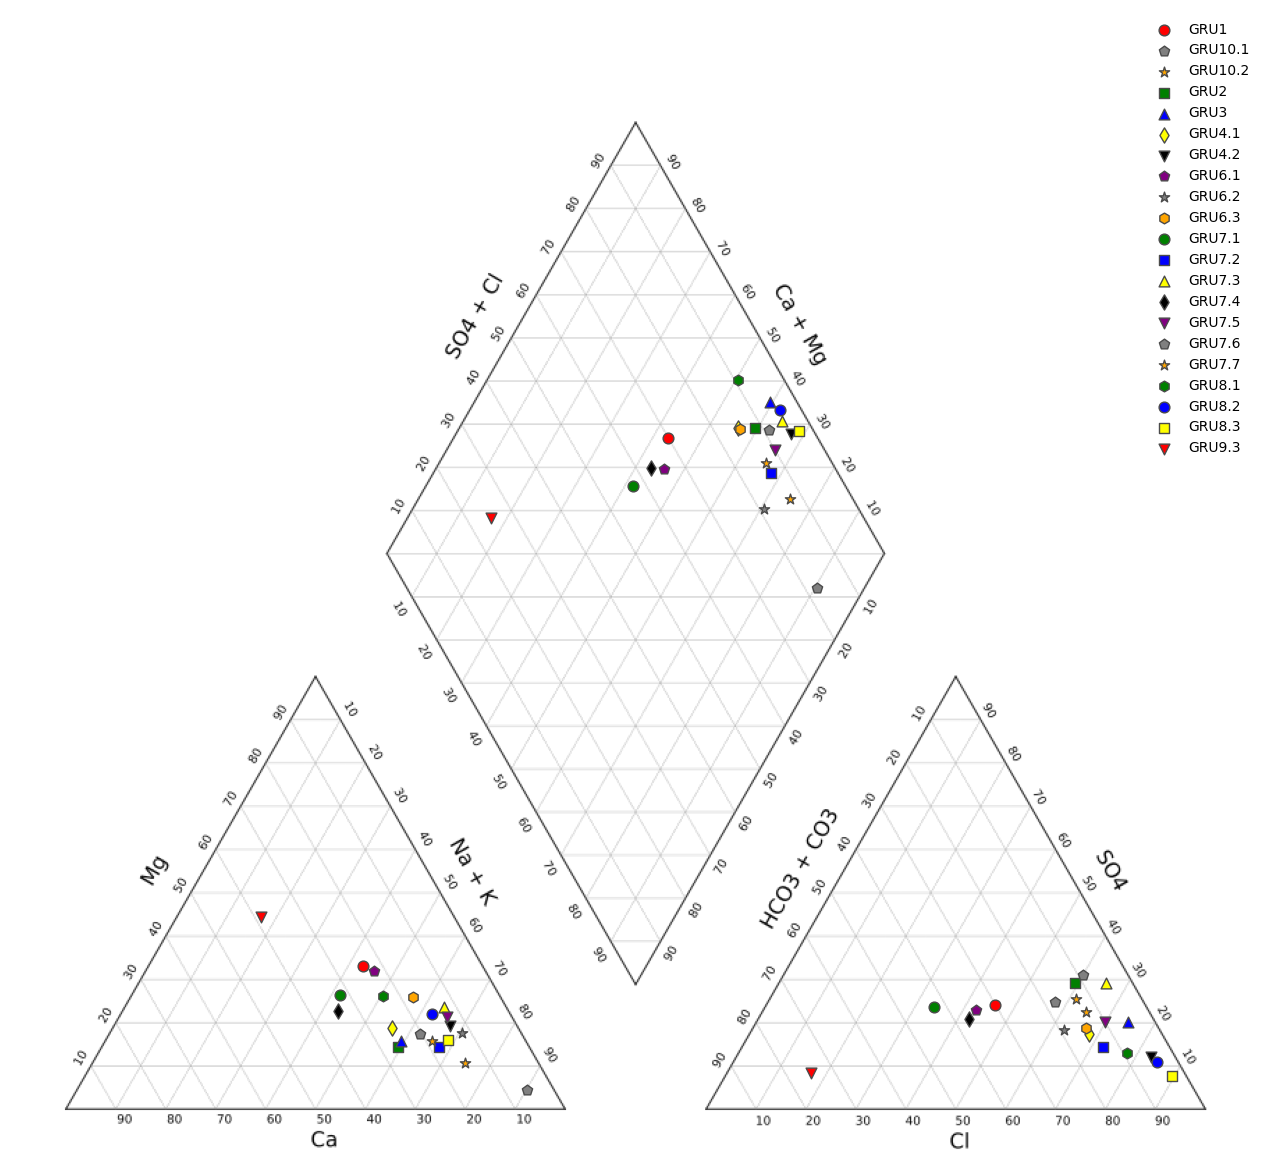

In [41]:
#coordinate function

def coordinate(Ca,Mg,Cl,SO4,Label):
    xcation = 40 + 360 - (Ca + Mg / 2) * 3.6
    ycation = 40 + (math.sqrt(3) * Mg / 2)* 3.6
    xanion = 40 + 360 + 100 + (Cl + SO4 / 2) * 3.6
    yanion = 40 + (SO4 * math.sqrt(3) / 2)* 3.6
    xdiam = 0.5 * (xcation + xanion + (yanion - ycation) / math.sqrt(3))
    ydiam = 0.5 * (yanion + ycation + math.sqrt(3) * (xanion - xcation))
    #print(str(xanion) + ' ' + str(yanion))
    c=np.random.rand(3,1).ravel()
    
    resource_unit = df_mqL.loc[Label, 'resource_unit']
    color_map = {
                'GRU1': 'red',
                'GRU2': 'green',
                'GRU3': 'blue',
                'GRU4.1': 'yellow',
                'GRU4.2': 'black',
                'GRU6.1': 'purple',
                'GRU6.2': 'grey',
                'GRU6.3': 'orange',
                'GRU7.1': 'green',
                'GRU7.2': 'blue',
                'GRU7.3': 'yellow',
                'GRU7.4': 'black',
                'GRU7.5': 'purple',
                'GRU7.6': 'grey',
                'GRU7.7': 'orange',
                'GRU8.1': 'green',
                'GRU8.2': 'blue',
                'GRU8.3': 'yellow',
                'GRU9.1': 'black',
                'GRU9.2': 'purple',
                'GRU9.3': 'red',
                'GRU10.1':  'grey',
                'GRU10.2': 'orange',
                 }
    shape_map = {'GRU1': 'o',
                'GRU2': 's',
                'GRU3':  '^',
                'GRU4.1': 'd',
                'GRU4.2': 'v',
                'GRU6.1': 'p',
                'GRU6.2': '*',
                'GRU6.3': 'h',
                'GRU7.1': 'o',
                'GRU7.2': 's',
                'GRU7.3': '^',
                'GRU7.4': 'd',
                'GRU7.5': 'v',
                'GRU7.6': 'p',
                'GRU7.7': '*',
                'GRU8.1': 'h',
                'GRU8.2': 'o',
                'GRU8.3': 's',
                'GRU9.1':'^',
                'GRU9.2': 'd',
                'GRU9.3': 'v',
                'GRU10.1': 'p',
                'GRU10.2': '*',
                 }
    color = color_map.get(resource_unit, 'gray')  # Default color if resource unit is not found
    shape = shape_map.get(resource_unit, 'o')  # Default shape if resource unit is not found

    listagraph = []
    listagraph.append(plt.scatter(xcation, ycation, zorder=1, c=color, s=60, marker=shape, edgecolors='#4b4b4b',
                                  label=resource_unit))
    listagraph.append(plt.scatter(xanion, yanion, zorder=1, c=color, s=60, marker=shape, edgecolors='#4b4b4b'))
    listagraph.append(plt.scatter(xdiam, ydiam, zorder=1, c=color, s=60, marker=shape, edgecolors='#4b4b4b'))
    return listagraph

plt.figure(figsize=(20,15))
plt.imshow(np.flipud(img),zorder=0)
for index, row in df_mqL.iterrows():
    coordinate(row['Ca_norm'],row['Mg_norm'],row['Cl_norm'],row['SO4_norm'],index)
plt.ylim(0,830)
plt.xlim(0,900)
plt.axis('off')
plt.legend(loc='upper right',prop={'size':10}, frameon=False, scatterpoints=1)
#plt.savefig('Output/Piper.jpeg')
#plt.savefig('../Output/Piper.pdf')
#plt.savefig('../Output/Piper.svg')

In [36]:
print(df_mqL.head())

  resource_unit  Ca (mq/L)  Mg (mq/L)  Na (mq/L)  K (mq/L)  HCO3 (mq/L)  \
0          GRU1   4.160905   5.700706   7.106247  0.315945     4.777042   
1       GRU10.1   5.021674   3.905140  78.974067  0.436700    15.524497   
2       GRU10.2   7.928562   5.623142  38.885358  0.418359     6.596469   
3          GRU2  10.220677   5.575047  22.412501  0.365356     4.401830   
4          GRU3  13.523683   8.525541  30.962938  0.811841     3.005704   

   Cl (mq/L)  SO4 (mq/L)   SO4_norm  HCO3_CO3_norm    Cl_norm    Mg_norm  \
0   7.248351    3.806383  24.042678      30.173760  45.783562  32.982941   
1  50.014678   21.639910  24.822364      17.807594  57.370042   4.420700   
2  33.278921   11.486902  22.364465      12.843020  64.792516  10.638724   
3  22.115251   10.921066  29.170958      11.757606  59.071435  14.453019   
4  38.879131   10.545171  20.112855       5.732794  74.154351  15.839663   

   Na_K_norm    Ca_norm  
0  42.943047  24.074012  
1  89.894660   5.684640  
2  74.360805  